# Examples for Bounded Innovation Propagation (BIP) MM ARMA parameter estimation

Import libraries and fix seed of rng for reproducibility

In [1]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib

# Fix random number generator for reproducibility
np.random.seed(1) 

## Example 1: AR(1) with 30 percent isolated outliers

In [7]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

### Generate isolated Outliers

In [8]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

### BIP MM Estimation

In [9]:
result = rsp.arma_est_bip_s(x_ao,p,q)

arma est bip s 52
[0.7253107]
[7.31981029e-05]
[0.7756614]


Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.778


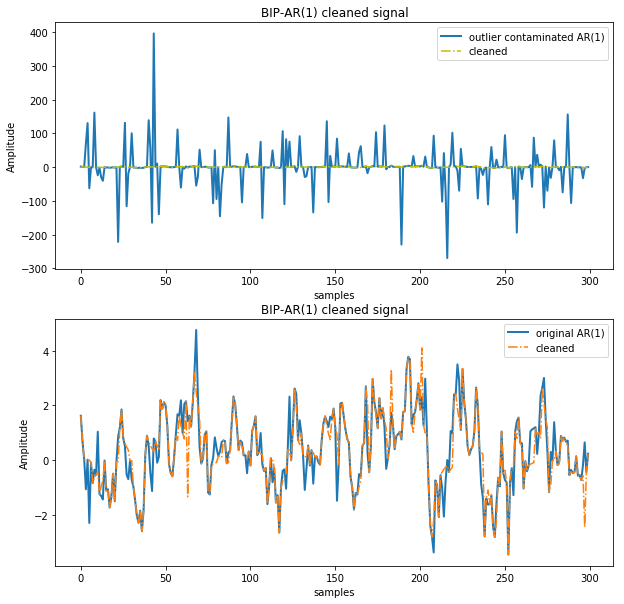

In [6]:
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

# Example 2: ARMA(1,1) with 10% patchy outliers

## Generate ARMA(1,1) observations

In [2]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1

## Generate a patch of outliers of length 101 samples

In [3]:
v = 1000*np.random.randn(101)

## 10% of patch additive outliers

In [4]:
x_ao = np.array(x)
x_ao[99:200] += v

### BIP-MM estimation

In [5]:
result = rsp.arma_est_bip_s(x_ao,p,q)

In [6]:
result['ar_coeffs'],result['ma_coeffs']

(array([-0.85344255]), array([0.40328705]))

In [7]:
result

{'ar_coeffs': array([-0.85344255]),
 'ma_coeffs': array([0.40328705]),
 'inno_scale': 1.2920007619450309,
 'cleaned_signal': array([ 1.62434536e+00,  1.01258895e+00,  1.59548125e-01, -1.05096447e+00,
        -1.89957673e-01,  2.73427202e-01, -5.39834623e-01, -8.44112246e-01,
        -5.08492081e-01, -5.92356221e-01,  9.38348885e-01,  1.19602817e+00,
         7.91641489e-01, -6.57759599e-02, -2.92641174e-01, -1.10725032e+00,
        -1.27820672e+00, -1.93490943e+00, -1.68128548e+00, -7.53770423e-01,
        -1.58707247e+00, -3.45058104e-01,  8.54488980e-01,  1.36640367e+00,
         2.09447775e+00,  1.17202553e+00,  6.77984627e-01, -4.17959777e-01,
        -7.89409788e-01, -1.54749980e-01, -7.09389642e-01, -1.10259739e+00,
        -1.64860132e+00, -2.30152124e+00, -2.68150425e+00, -2.29211722e+00,
        -2.95353705e+00, -2.35187601e+00, -1.74815491e-01,  9.34152203e-01,
         7.03895042e-01, -3.62880041e-01, -1.21498812e+00,  5.10416715e-01,
         8.46124633e-01,  5.00656104e-02

In [7]:
print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f ''' %(result['ar_coeffs'],result['ma_coeffs']))

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.853 

ma_coeff_est = 0.403 


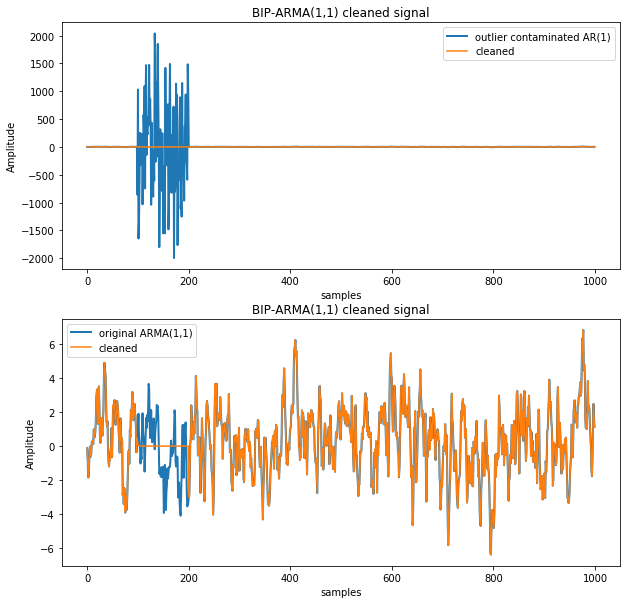

In [11]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

# Example 3: MA(2) with 20 % isolated Outliers

## Generate MA(2) observations

In [12]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

## Generate isolated Outliers

In [13]:
cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

## 20 % of isolated additive Outliers

In [14]:
x_ao = x+v

## BIP MM estimation

In [15]:
result = rsp.arma_est_bip_s(x_ao,p,q)

In [16]:
print('''Example 3: MA(2) ma_coeff [-0.7 0.5]' \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [-0.85340684 -0.14634464]


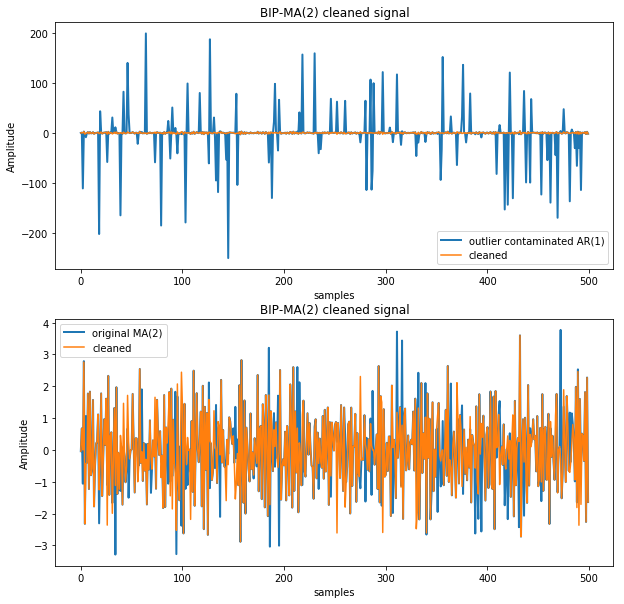

In [17]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()

In [2]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import least_squares as lsq
import scipy.io as sio

p = 1
q = 1
beta_initial = np.array([0.8167, -.2167])
x_ao = sio.loadmat('x_ao_s_ma2')['x_ao'].flatten()

# optimize on residuals
F = lambda beta: rsp.arma_s_resid_sc(x_ao, beta, p, q)[0]

beta_arma = lsq(F, beta_initial,xtol=5*1e-7,ftol=5*1e-7)['x'] # ,method='lm'

beta_arma ,rsp.arma_s_resid_sc(x_ao, beta_arma, p, q)[0]

(array([ 0.82635269, -0.15448774]), 1.0826771824719288)

In [10]:
beta_initial

array([0.78999773, 0.18103919])

In [1]:
import scipy.io as sio
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import least_squares as lsq

x_ao = sio.loadmat('x_ao_s_ma2')['x_ao'].flatten()
p=1
q=1

rsp.arma_s_resid_sc(x_ao, np.array([.8233,-.2606]),p,q)[0] # stimmt
rsp.bip_s_resid_sc(x_ao, np.array([.8233,-.2606]),p,q)[0] # stimmt
rsp.arma_s_resid_sc(x_ao,[ 0.06058278, -0.08011295],p,q)[0] # stimmt
rsp.bip_s_resid_sc(x_ao, [ 0.85344255, -0.40328705],1,1)[0] 

1.1991290735703728